# My Lesson 1

**Homework tasks**
1. [DONE] Get AWS instance running (either g2 or m4 if not yet approved for g2) after contacting support etc.
2. [DONE] Setup ssh keys as per instructions in setup video
3. [DONE] install bash setup script onto server instance
4. [DONE] launch jupyter notebook on the instance
5. [DONE] once the notebook is running, review the lesson 1 notebook notes and run each cell of code to figure out what python and vgg is doing
6. [DONE] install kaggle CLI onto the server instance
7. [DONE] use the kaggle CLI to download the current data for the Dogs vs. Cats Redux competition
8. [DONE] configure the new data to the file structure in the same way that was used in the sample lesson 1 notebook
9. [DONE] make a copy of the lesson 1 notebook and use the new copy to draw in the new Dogs Vs. Cats data (if you copy the notebook outside of the course folder, don't forget the utils.py, vgg26.py files etc)
10. [DONE] Run the relevant code cells on the sample set of new Dogs v. Cats data to make a prediction on the new image data set.
11. [CURRENT] Once the sample set works, modify the jupyter notebook to use the new test data images
12. [CURRENT] write a script that takes the predict() data of the new Dogs vs. Cats data and writes the data to a new csv file in the format of the sample_submission.csv file that was downloaded with the Dogs vs. Cats
13. submit that new submission.csv file to the kaggle via the CLI tool
14. check the public scoreboard for your own ranking
15. modify or tune current code in the lesson 1 notebook to try to get into the top 50% ranking of the current Dogs v Cats competition
16. start exploring the other new datasets on kaggle and decide which one you or some teammates would like to study further during the course
17. download the new data to your EC2 instance and repeat the previous steps with your brand new data.

### Task 5: What is VGG doing
`vgg = Vgg16()` sets up the python class. It initializes the network architecture and loads the pretrained weights. Input shape is 3 by 224 by 224 and the output is 1 by 1000 (classes). It also loads the class names callables with `vgg.classes`.

`batches = vgg.get_batches(path+'train', batch_size=4)` loads the  *Keras* batch iterator. `batch_size` indicates how many pictures at one time. it contains the image files and the labels (for the training data only I assume). This resizes the images!

`vgg.predict(imgs, True)` makes a prediction on the images. True prints the details. How many? 4 always? Is this how multi-label prediction works?

`vgg.finetune(batches)` adapts the model architecture to the new input data. It simply changes the last FC layer and the classes. What about the input image size?

`vgg.fit(batches, val_batches, nb_epoch=1)` fits the model parameters (all of them?) to the batches



### Task 7: Download dogs vs cats dataset using kaggle cli
- kg config -g -u 'raspstephan' -p 'paper_password' -c 'dogs-vs-cats-redux-kernels-edition'
- kg download
- unzip 

In [1]:
path = '/home/ubuntu/data/dogscats_redux/'
# path = '/Users/stephanrasp/repositories/courses/data/dogscats_redux/'

## Task 8: Configure file structure
The current file structure of the redux data set is:
- a train directory with the labelled cat and dog files in it (12500 images each) and 
- a test dataset with unlabelled picture files.

We want to get the following directories:
- train directory with subdirectories cats and dogs (11500 images each)
- valid directory with subdirectories (1000 images each)
- test directory with unlabelled data [that can stay the same]
- a sample directory with subdirectories train (let's say 100 randomly) and valid (20 other randomly) and those with subdirectories cats and dogs 

In [2]:
from __future__ import division,print_function

In [3]:
# Create required repositories
import os
os.makedirs(os.path.join(path, 'sample', 'train', 'cats'))
os.makedirs(os.path.join(path, 'sample', 'train', 'dogs'))
os.makedirs(os.path.join(path, 'sample', 'valid', 'cats'))
os.makedirs(os.path.join(path, 'sample', 'valid', 'dogs'))
os.makedirs(os.path.join(path, 'valid', 'cats'))
os.makedirs(os.path.join(path, 'valid', 'dogs'))

In [4]:
# Create new subdirs in train folder
os.makedirs(os.path.join(path, 'train', 'cats'))
os.makedirs(os.path.join(path, 'train', 'dogs'))

In [5]:
# Move pictures into subfolders
# mv complains that argument list is too long
# So we will glob the dog and cat files
from glob import glob
cat_fns = sorted(glob(os.path.join(path, 'train') + '/cat.*'))
dog_fns = sorted(glob(os.path.join(path, 'train') + '/dog.*'))

In [6]:
# First move all of the files in subfolder
for fn in cat_fns:
    os.system('mv ' + fn + ' ' + os.path.join(path, 'train', 'cats'))
for fn in dog_fns:
    os.system('mv ' + fn + ' ' + os.path.join(path, 'train', 'dogs'))

In [7]:
# Then randomly pick 1000 from each list and mv to valid folder 
# Need to update lists
import random
cat_fns = sorted(glob(os.path.join(path, 'train', 'cats') + '/cat.*'))
dog_fns = sorted(glob(os.path.join(path, 'train', 'dogs') + '/dog.*'))
valid_size = 1000
for fn in random.sample(cat_fns, valid_size):
    os.system('mv ' + fn + ' ' + os.path.join(path, 'valid', 'cats'))
for fn in random.sample(dog_fns, valid_size):
    os.system('mv ' + fn + ' ' + os.path.join(path, 'valid', 'dogs'))

In [8]:
# And finally, copy some files to the sample dir
train_cat_fns = sorted(glob(os.path.join(path, 'train', 'cats') + '/cat.*'))
train_dog_fns = sorted(glob(os.path.join(path, 'train', 'dogs') + '/dog.*'))
valid_cat_fns = sorted(glob(os.path.join(path, 'valid', 'cats') + '/cat.*'))
valid_dog_fns = sorted(glob(os.path.join(path, 'valid', 'dogs') + '/dog.*'))
sample_train_size = 100
sample_valid_size = 20
for fn in random.sample(train_cat_fns, sample_train_size):
    os.system('cp ' + fn + ' ' + os.path.join(path, 'sample', 
                                              'train', 'cats'))
for fn in random.sample(train_dog_fns, sample_train_size):
    os.system('cp ' + fn + ' ' + os.path.join(path, 'sample', 
                                              'train', 'dogs'))
for fn in random.sample(valid_cat_fns, sample_valid_size):
    os.system('cp ' + fn + ' ' + os.path.join(path, 'sample', 
                                              'valid', 'cats'))
for fn in random.sample(valid_dog_fns, sample_valid_size):
    os.system('cp ' + fn + ' ' + os.path.join(path, 'sample', 
                                              'valid', 'dogs'))

In [9]:
# Now deal with the test data which needs to be in a unknown directory
%mkdir $path/test/unknown
%mv $path/test/*.jpg $path/test/unknown/

### Task 10: Setup and train the model for the new dataset
Here comes the big one!
So what are the steps:
1. Create Vgg16 class
2. Get train and valid batches
3. Then let's make a test prediction 
4. Finetune the model
5. Fit the model to the new data

In [10]:
sample_path = os.path.join(path, 'sample')

In [11]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

Using Theano backend.


In [12]:
# 1. Create Vgg16 class
vgg = Vgg16()

In [13]:
# 2. Get train and valid batches
batch_size = 4
train_batches = vgg.get_batches(sample_path + '/train', 
                                batch_size=batch_size)
valid_batches = vgg.get_batches(sample_path + '/valid', 
                                batch_size=batch_size)

Found 200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


Ooops, I accidentally didn't get the correct valid sample size, oh well. Lets just continue

In [14]:
# What's in the batches
imgs, labels = next(train_batches)

In [15]:
import utils
%matplotlib inline

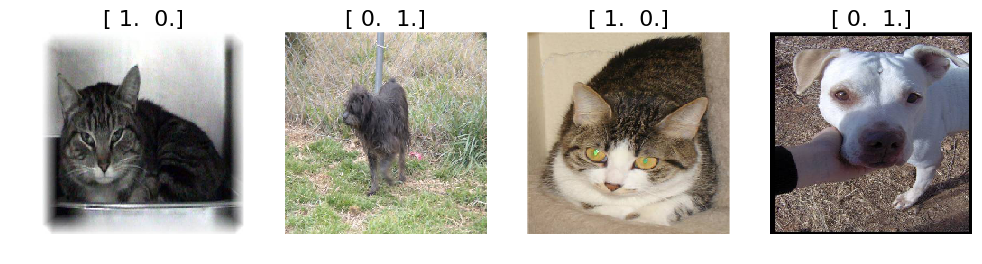

In [16]:
utils.plots(imgs, titles=labels)

God these pictures are stupid :D

In [17]:
# Let's make a test prediction with the model 
vgg.predict(imgs, True)

(array([ 0.6946,  0.4821,  0.5993,  0.7121], dtype=float32),
 array([281, 226, 281, 180]),
 [u'tabby', u'briard', u'tabby', u'American_Staffordshire_terrier'])

Fur coat, hehehehehe...

In [18]:
# Ok Lets "finetune" the model
vgg.finetune(train_batches)

In [19]:
vgg.classes

['cats', 'dogs']

In [20]:
# Now let's train the model briefly, we will skip this for now...

In [21]:
vgg.fit(train_batches, valid_batches, nb_epoch=1)

Epoch 1/1
200/200 [==============================] - 63s - loss: 0.4642 - acc: 0.8550 - val_loss: 0.0407 - val_acc: 0.9750


Things I am confused about...
- What's an epoch and what are the individual steps (200)?
- What is the batch size?

- An epoch is a full run through the training example. The individual steps then are the images.
- The optimizer is set in the compile step.
- Batch size is number of images per gradient update, so is this minibatch gradient descent?

### Task ??? Create a prediction for the test set and save as submission file

In [27]:
# Test data needs to be in a subfolder inside the test directory
# WATCH OUT THIS DOES NOT WORK!!! I manually moved the data
# Need to put this in the beginning and fix it!
# os.mkdir(os.path.join(path, 'test', 'unknown'))

32256

In [29]:
# from glob import glob
# fns = sorted(glob(os.path.join(path, 'test') + '/*'))
# for fn in fns:
#     os.system('mv ' + fn + ' ' + os.path.join(path, 'test', 'unknown'))

In [ ]:
test_batches, predicts = vgg.test(path + '/test/', batch_size=16)

Found 12500 images belonging to 1 classes.


In [ ]:
print test_batches.filenames[:5]
print predicts[:5]

In [ ]:
from PIL import Image
Image(path + '/test/' + test_batches.filenames[0])

In [ ]:
%mkdir $path/results/
utils.save_array(path + 'results/filenames.dat', 
                 test_batches.filenames)
utils.save_array(path + 'results/predicts.dat', predicts)

In [ ]:
# Now create the submission file
isdog = predicts[:, 1]
sub_ids = [fn.rstrip('.jpg').lstrip('unknown/') for 
           fn in test_batches.filenames]
subm = np.stack([sub_ids,isdog], axis=1)
subm[:5]

In [ ]:
%mkdir $path/submission/
sub_fn = path + 'submission/submission1.csv'

In [ ]:
np.savetxt(sub_fn, subm, fmt='%d,%.5f', header='id,label', comments='')

In [ ]:
%cd $path/submission/
%kg submit `submission1.csv` -u `raspstephan` -p `****` -c `dogs-vs-cats-redux-kernels-edition` -m `A first test submission with the vgg model.`